<a href="https://colab.research.google.com/github/yxyfer/EPTIA_NLP3/blob/main/lab02/SCIA_NLP3_Lab02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os 
import pandas as pd 

from IPython.display import HTML

In [2]:
%%capture
! pip install fasttext

# I. Language detection (24 points)

In [3]:
# for the fasttext model that has been saved
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Setup 

In [4]:
%%capture
! git clone https://github.com/MastafaF/LanguageDetection.git

In [6]:
os.listdir("./LanguageDetection")

FileNotFoundError: ignored

In [5]:
# CD the LanguageDetection folder - we are working in the below folder now
os.chdir("./LanguageDetection")

In [7]:
# only if not installed
! unzip dataset.csv.zip

Archive:  dataset.csv.zip
replace dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


## Data Exploration Analysis

In [8]:
data = pd.read_csv("./dataset.csv")

In [9]:
# Sample of the data
HTML(data[data.language == "Chinese"].sample().to_html())

,Text,language
2147,年五-六月份爆發澱粉含順丁烯二酸酐食安事件，並擴及全台灣，俗稱毒澱粉事件。這一波食品安全危機中，台南市部份澱粉廠商為主要供應毒澱粉來源，當時衛生署採用選定特定的類項食品的全面稽查末端小吃店方式，展現所謂「全國同步、積極稽查」的執行作為，要求店家出具檢驗合格證明文件，否則不得販售該類產品的措施。而台南市長賴清德砲轟此執行作為，本末倒置、並不具任何效益。並指示暫停此種無效益的行政稽查，台南市處理原則為「源頭管理、阻斷貨源、追查上下游、並輔導店家使用合法澱粉」，只查在台南市轄區內製造廠，透過查核供貨帳冊及出貨單，查出其下游中盤商，並在媒體前建議中央參考南市源頭管理的做法。在月日市政府第次市政會議上市長宣稱：『所有問題澱粉月日全數銷毀，已沒有問題澱粉在台南市轄區內流通，請全體市民安心』。年月日食藥局表示市售抽驗毒澱粉未再發現新案，決定跟進台南市政府的作法，不再強制小吃攤飯張貼安全證明。而後在月日檢方查出茂利澱粉廠二度販售毒澱粉，將毒澱粉重新包裝再低價賣出，供貨遍及全台各地夜市、小吃。對於再度爆發毒澱粉案市長賴清德僅表示痛心，南市衛生局長表示將依新食品衛生管理法開罰。月日三進粉業再度被查出有庫存未申報的毒澱粉。,Chinese


### Question 1.1. Describe the distribution of languages and give at least two comments about the dataset. (1 point)

In [10]:
################################################
# your implementation goes here

def get_language_distrib(data):
    print(data.groupby('language').size())

get_language_distrib(data)
##################################################

language
Arabic        1000
Chinese       1000
Dutch         1000
English       1000
Estonian      1000
French        1000
Hindi         1000
Indonesian    1000
Japanese      1000
Korean        1000
Latin         1000
Persian       1000
Portugese     1000
Pushto        1000
Romanian      1000
Russian       1000
Spanish       1000
Swedish       1000
Tamil         1000
Thai          1000
Turkish       1000
Urdu          1000
dtype: int64


### Question 1.2. Do the appropriate pre-processing to maximise the accuracy of language detection. What is your strategy? (1 point)

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split

In [12]:
X=data['Text']
y=data['language']

In [13]:
X[0]

'klement gottwaldi surnukeha palsameeriti ning paigutati mausoleumi surnukeha oli aga liiga hilja ja oskamatult palsameeritud ning hakkas ilmutama lagunemise tundemärke  aastal viidi ta surnukeha mausoleumist ära ja kremeeriti zlíni linn kandis aastatel – nime gottwaldov ukrainas harkivi oblastis kandis zmiivi linn aastatel – nime gotvald'

In [14]:
import gc

#### Question 1.2.1. Preprocess X

In [15]:
import re
from gensim.parsing import (
    preprocess_string,
    strip_numeric,
    strip_multiple_whitespaces,
    #strip_punctuation,
  )
from sklearn.feature_extraction.text import CountVectorizer


################################################
# your implementation goes here

def pre_process(text):
  CUSTOM_FILTERS = [
    lambda s: s.lower(),
    lambda s: re.sub(r'[!@#$(),"%^*?:;~`]', ' ', s),
    strip_numeric,
    #strip_punctuation, 
    strip_multiple_whitespaces,
  ]
  
  return ' '.join(
      preprocess_string(text, CUSTOM_FILTERS)
    )

X = X.apply(pre_process)

X_copy = X

# cv = CountVectorizer()
cv = CountVectorizer(min_df=5)
cv.fit(X)
X = cv.transform(X)
X = X.toarray()

print(X)
################################################

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#### Question 1.2.1. Preprocess labels (y)


In [16]:
from sklearn import preprocessing

################################################
# your implementation goes here

le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

print(y)

################################################

[ 4 17 19 ... 16  1 14]


### Question 1.5. Train a model of your choice and describe the accuracy across languages. Use an 80%, 20% train-test split. Performance is not key but explain thoroughly the process and the metric(s) you are tracking. (4 points)

#### 1.5.1. Create & Train Model

In [17]:
%%time
from sklearn.naive_bayes import MultinomialNB

################################################
# your implementation goes here

indices = list(range(len(X)))
train_indices, test_indices = train_test_split(indices, test_size=0.20, random_state=42)

def train_model(X_train, y_train):
  clf = MultinomialNB()
  clf.fit(X_train, y_train)

  return clf

def get_values_from_indices(x_vals, y_vals, indices):
  len_vals = len(x_vals)
  X_vals = [x_vals[i] for i in range(len_vals) if i in indices]
  y_vals = [y_vals[i] for i in range(len_vals) if i in indices]

  return X_vals, y_vals

X_train, y_train = get_values_from_indices(X, y, train_indices)
X_test, y_test = get_values_from_indices(X, y, test_indices)

clf = train_model(X_train, y_train)
print(f'General Model Score: {clf.score(X_test, y_test)}')

################################################

General Model Score: 0.9286363636363636
CPU times: user 3min 35s, sys: 5.61 s, total: 3min 41s
Wall time: 3min 42s


In [18]:
def predict_custom(sentence):
  return le.inverse_transform(clf.predict(cv.transform([sentence]).toarray()))[0]

In [19]:
predict_custom("I am French and I love English")

'English'

In [20]:
predict_custom('Bonjour comment allez vous')

'French'

#### 1.5.2 Accuracy per Language

In [21]:
################################################
# your implementation goes here

def score_per_lang(y_true, y_hat):
  Dic = [i for i in range(22)]
  language_pos = dict.fromkeys(Dic, 0)
  language_tot = dict.fromkeys(Dic, 0)

  for t, h in zip(y_true, y_hat):
    if h == t:
        language_pos[t] += 1
    language_tot[t] += 1

  accuracies = dict()
  print('Accuracy for each language:')
  for i in range(22):
    lang = le.inverse_transform([i])[0]
    if language_tot[i] != 0:
      accuracy = language_pos[i] / language_tot[i]
    else:
      accuracy = 0
    accuracies[lang] = accuracy
    print(f'{lang:10}: {accuracy:f}')

  return accuracies


y_hat = clf.predict(X_test)
lang_accuracies = score_per_lang(y_hat, y_test)

################################################

Accuracy for each language:
Arabic    : 1.000000
Chinese   : 0.910256
Dutch     : 0.982533
English   : 0.713235
Estonian  : 0.984456
French    : 0.939394
Hindi     : 0.995146
Indonesian: 0.995215
Japanese  : 0.968085
Korean    : 0.994709
Latin     : 0.979487
Persian   : 0.994898
Portugese : 0.994709
Pushto    : 1.000000
Romanian  : 0.979695
Russian   : 0.985981
Spanish   : 0.975369
Swedish   : 0.493113
Tamil     : 1.000000
Thai      : 1.000000
Turkish   : 0.989950
Urdu      : 1.000000


## FastText for language detection

### FastText training setup 

In [22]:
! wget http://downloads.tatoeba.org/exports/sentences.tar.bz2

URL transformed to HTTPS due to an HSTS policy
--2023-01-07 09:19:56--  https://downloads.tatoeba.org/exports/sentences.tar.bz2
Resolving downloads.tatoeba.org (downloads.tatoeba.org)... 94.130.77.194
Connecting to downloads.tatoeba.org (downloads.tatoeba.org)|94.130.77.194|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 172915061 (165M) [application/octet-stream]
Saving to: ‘sentences.tar.bz2’

sentences.tar.bz2   100%[===================>] 164.90M  25.3MB/s    in 7.4s    

2023-01-07 09:20:04 (22.3 MB/s) - ‘sentences.tar.bz2’ saved [172915061/172915061]



In [23]:
! bunzip2 sentences.tar.bz2

bunzip2: Output file sentences.tar already exists.


In [24]:
! ls

all.txt			data_test.txt	sentences.csv	   valid.txt
dataset.csv		data_train.txt	sentences.tar
dataset.csv.zip		LICENSE		sentences.tar.bz2
data_test_no_label.txt	README.md	train.txt


In [44]:
! tar xvf sentences.tar

sentences.csv


In [45]:
! ls

dataset.csv  dataset.csv.zip  LICENSE  README.md  sentences.csv  sentences.tar


In [46]:
! head -10 sentences.csv

1	cmn	我們試試看！
2	cmn	我该去睡觉了。
3	cmn	你在干什麼啊？
4	cmn	這是什麼啊？
5	cmn	今天是６月１８号，也是Muiriel的生日！
6	cmn	生日快乐，Muiriel！
7	cmn	Muiriel现在20岁了。
8	cmn	密码是"Muiriel"。
9	cmn	我很快就會回來。
10	cmn	我不知道。


In [47]:
! awk -F"\t" '{print"__label__"$2" "$3}' < sentences.csv | shuf > all.txt

In [48]:
! ls

all.txt      dataset.csv.zip  README.md      sentences.tar
dataset.csv  LICENSE	      sentences.csv


In [49]:
! head -5 all.txt

__label__kab Tettexfa deg usallas-nni.
__label__pol Tom wygląda trochę niebezpiecznie.
__label__kab Ad rekben ihi ɣer Warzazat.
__label__srp Постати добар писац исто је као добар тесар; треба пажљиво тесати своје реченице.
__label__eng Who are the people I saw her with?


In [50]:
! head -n 10000 all.txt > valid.txt

In [51]:
! tail -n +10001 all.txt > train.txt

In [52]:
! head -5 train.txt

__label__tuk Ol öz aýalyny urup otyrdy.
__label__mar तू त्यांच्यासाठी सँडविच बनवते आहेस का?
__label__rus Том одинок, и ему не с кем играть.
__label__epo Ne heroumu!
__label__epo Knabinoj maturiĝas pli frue ol knaboj.


### Question 1.6. Train a fasttext model on Tatoeba parallel corpus and check that performance is good. (3 points)

In [25]:
del X
gc.collect()

0

In [26]:
import fasttext

#### Question 1.6.1. Train fasttext model on Tatoeba (2 points)

In [ ]:
%%time
import fasttext

# Check the fasttext library and implement the training
###########################################

# your implementation goes here
pass

fmodel = fasttext.train_supervised('train.txt') #, lr=1, epoch=1)

################################################

# @TODO: Save your model when trained 
fmodel.save_model("langdetect.bin")

CPU times: user 1h 40min 15s, sys: 9.02 s, total: 1h 40min 24s
Wall time: 1h 40min 40s


In [27]:
fmodel = fasttext.load_model('/content/drive/MyDrive/ColabNotebooks/NLP3/lab02/langdetect.bin')

In [28]:
# Sanity check 
fmodel.predict("I am French and I love English")

(('__label__eng',), array([1.00000882]))

In [29]:
fmodel.predict("Bonjour je suis")

(('__label__fra',), array([0.99995446]))

#### Question 1.6.2. Evaluate performance of fasttext model on valid.txt (1 point)

In [30]:
%%capture
pip install iso639-lang

In [31]:
from iso639 import Lang

Lang('ara')

Lang(name='Arabic', pt1='ar', pt2b='ara', pt2t='ara', pt3='ara', pt5='')

In [32]:
from iso639 import Lang

class ModelPredict(object):
  def __init__(self, model, le, nb_languages=22):
    self.model = model
    self.le = le
    self.nb_languages = nb_languages

    self.languages = self.get_languages()
    self.flabels = self.format_model_labels()
    self.lang_to_code, self.code_to_lang = self.get_code_to_lang()


  def predict(self, sentence):
    lang_code = self.model.predict(sentence)[0][0].replace('__label__', '')
    return self.code_to_lang.get(lang_code, 'Not Found')

  def predict_set(self, test_set):
    y_hat = []
    for sentence in test_set:
      label = self.predict(sentence)
      if label == 'Not Found':
        y_hat_curr = -1;
      else:
        y_hat_curr = self.le.transform([label])[0]
      y_hat.append(y_hat_curr)

    return y_hat

  ### HELPERS

  def get_languages(self):
    languages = []
    for i in range(self.nb_languages):
      lang = self.le.inverse_transform([i])[0]
      languages.append(lang)

    return languages

  def remove_label(self, str):
    return str.replace('__label__', '')

  def format_model_labels(self):
    labels_raw = sorted(self.model.get_labels())
    labels = list(map(lambda str: self.remove_label(str), labels_raw))
    return labels[1:]

  def get_code_to_lang(self):
    lang_to_code = dict.fromkeys(self.languages, '')

    for lang in self.languages:
      lang_code = Lang('Portuguese').pt3 if lang == 'Portugese' else 'pes' if lang == 'Persian' else (Lang(lang).pt3 if lang != 'Chinese' else 'cmn')
      if lang_code in self.flabels:
        lang_to_code[lang] = lang_code

    code_to_lang = {v: k for k, v in lang_to_code.items()}

    for lang in ['lzh', 'hak', 'cjy', 'cpi', 'hsn', 'gan', 'izh']:
      code_to_lang[lang] = 'Chinese'

    return lang_to_code, code_to_lang
    

In [33]:
mp = ModelPredict(fmodel, le)

In [34]:
print(mp.languages[:5])
print(mp.flabels[:10])

['Arabic', 'Chinese', 'Dutch', 'English', 'Estonian']
['abk', 'acm', 'ady', 'afb', 'afh', 'afr', 'aii', 'ain', 'ajp', 'akl']


In [35]:
mp.predict('Bonjour Comment allez vous')

'French'

In [36]:
# Hint: Create dataframe from valid.txt and evaluate performance 

###########################################

# your implementation goes here

result = fmodel.test('valid.txt')
print("Validation set accuracy:", result[1])

################################################

Validation set accuracy: 0.9879


### Question 1.7. Test your fasttext model on the same dataset as in question 1-5. Compare with your custom model (make sure you use the exact same data for testing). How can you explain the difference in performance between the two models? (3 points)

In [37]:
import fasttext

###########################################

# your implementation goes here

def save_data(X, y, train=False, label=True):
  filename = 'data_train.txt' if train else ('data_test.txt' if label else 'data_test_no_label.txt')
  
  file = open(filename, 'w')
  for x_curr, y_curr in zip(X, y):
    if label:
      lang = le.inverse_transform([y_curr])[0]
      lang_code = Lang('Portuguese').pt3 if lang == 'Portugese' else Lang(lang).pt3
      y_curr = '__label__' + lang_code
      final_string = y_curr + ' ' + x_curr + '\n'
    else:
      final_string = x_curr + '\n'
    
    file.write(final_string)
  file.close()


#fX_train, fX_test, fy_train, fy_test = train_test_split(X_copy, y, test_size=0.20)

fX_train, fy_train = get_values_from_indices(X_copy, y, train_indices)
fX_test, fy_test = get_values_from_indices(X_copy, y, test_indices)

save_data(fX_train, fy_train, train=True)             # Train with labels
save_data(fX_test, fy_test, train=False)              # Test  with labels
save_data(fX_test, fy_test, train=False, label=False) # Test  no   labels

################################################

In [38]:
result = fmodel.test('data_test.txt')
print("Validation set accuracy:", result[1])

Validation set accuracy: 0.83337496877342


In [39]:
fy_hat = mp.predict_set(fX_test)
print(-1 in fy_hat)

True


### Question 1.8. Compute your performance metrics yourself and compare with sklearn. (1 point)

#### 1.8.1. Personal Metrics

In [43]:
def accuracy_score_recoded(y_true, y_hat):
  return np.mean(y_true == (y_hat))

print(f'Accuracy Score: {accuracy_score_recoded(fy_test, fy_hat)}\n')

Accuracy Score: 0.0



In [44]:
_ = score_per_lang(fy_test, fy_hat)

Accuracy for each language:
Arabic    : 0.980198
Chinese   : 0.004975
Dutch     : 0.969565
English   : 1.000000
Estonian  : 0.810000
French    : 0.989362
Hindi     : 0.985577
Indonesian: 0.868545
Japanese  : 0.845361
Korean    : 0.957895
Latin     : 0.885714
Persian   : 0.994898
Portugese : 0.958763
Pushto    : 0.000000
Romanian  : 0.969543
Russian   : 0.995305
Spanish   : 0.984925
Swedish   : 1.000000
Tamil     : 0.474747
Thai      : 0.117347
Turkish   : 0.974874
Urdu      : 0.866995


#### 1.8.2. sklearn Metrics

In [45]:
from sklearn.metrics import accuracy_score

accuracy_score(fy_test, fy_hat)

0.8027272727272727

# II. Rotate two semantic spaces (23 points) – Not guided coding


In [ ]:
!git clone https://github.com/facebookresearch/MUSE.git

Cloning into 'MUSE'...
remote: Enumerating objects: 239, done.
remote: Total 239 (delta 0), reused 0 (delta 0), pack-reused 239
Receiving objects: 100% (239/239), 215.77 KiB | 615.00 KiB/s, done.
Resolving deltas: 100% (136/136), done.


In [ ]:
%cd MUSE

/content/MUSE/MUSE


## 4. Align the French space and the English space together, with the method of your choice.

In [ ]:
!curl -Lo data/wiki.en.vec https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.en.vec
!curl -Lo data/wiki.fr.vec https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.fr.vec

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    16  100    16    0     0    246      0 --:--:-- --:--:-- --:--:--   246
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    16  100    16    0     0    457      0 --:--:-- --:--:-- --:--:--   457


In [ ]:
%cd data

/content/MUSE/MUSE/data


In [ ]:
!ls

get_evaluation.sh  wiki.en.vec	wiki.fr.vec


In [ ]:
!bash get_evaluation.sh

In [ ]:
%cd ..

/content/MUSE/MUSE


In [ ]:
# !python supervised.py --src_lang fr --tgt_lang en --src_emb data/wiki.fr.vec --tgt_emb data/wiki.en.vec --n_refinement 5 --dico_train "identical_char"
# Entrainement déjà fait (pas très long mais permet de gagner du temps : https://we.tl/t-YjTZodgN7u)

In [ ]:
path_to_best_mapping = '/content/drive/MyDrive/best_mapping.pth'

## 5. Visualize the output on a few words of your choice. Comment on the performance of the alignment based on the output.

In [ ]:
import torch

In [ ]:
model = torch.load(path_to_best_mapping)
model

array([[-0.10615373, -0.06533183,  0.0364729 , ..., -0.03633231,
         0.01911198, -0.04049802],
       [-0.00426724, -0.0480128 ,  0.15324669, ..., -0.00072463,
        -0.06351313,  0.04524541],
       [-0.04115835, -0.0369157 ,  0.03164461, ...,  0.01667204,
        -0.06334008, -0.0421579 ],
       ...,
       [ 0.09911308, -0.01475407,  0.05105206, ...,  0.02839697,
         0.08645973, -0.0449401 ],
       [ 0.01704676,  0.02572099,  0.02233682, ...,  0.0065214 ,
        -0.08996747,  0.02231632],
       [-0.00323281, -0.02875913, -0.02685219, ..., -0.05850187,
        -0.06768257, -0.05339041]], dtype=float32)

In [ ]:
import io
import numpy as np

def load_vec(emb_path, nmax=50000, model=None):
    vectors = []
    word2id = {}
    with io.open(emb_path, 'r', encoding='utf-8', newline='\n', errors='ignore') as f:
        next(f)
        for i, line in enumerate(f):
            word, vect = line.rstrip().split(' ', 1)
            vect = np.fromstring(vect, sep=' ')
            assert word not in word2id, 'word found twice'
            vectors.append(model @ vect if model is not None else vect)
            word2id[word] = len(word2id)
            if len(word2id) == nmax:
                break
    id2word = {v: k for k, v in word2id.items()}
    embeddings = np.vstack(vectors)
    return embeddings, id2word, word2id

In [ ]:
src_path = '/content/MUSE/data/wiki.fr.vec'
tgt_path = '/content/MUSE/data/wiki.en.vec'
nmax = 500_000  # maximum number of word embeddings to load

src_embeddings, src_id2word, src_word2id = load_vec(src_path, nmax)
tgt_embeddings, tgt_id2word, tgt_word2id = load_vec(tgt_path, nmax)
src_mused_embeddings, src_mused_id2word, src_mused_word2id = load_vec(src_path, nmax, model)


In [ ]:
def get_nn(word, src_emb, src_id2word, tgt_emb, tgt_id2word, K=5):
    print("Nearest neighbors of \"%s\":" % word)
    word2id = {v: k for k, v in src_id2word.items()}
    word_emb = src_emb[word2id[word]]
    scores = (tgt_emb / np.linalg.norm(tgt_emb, 2, 1)[:, None]).dot(word_emb / np.linalg.norm(word_emb))
    k_best = scores.argsort()[-K:][::-1]
    for i, idx in enumerate(k_best):
        print('%.4f - %s' % (scores[idx], tgt_id2word[idx]))

In [ ]:
# printing nearest neighbors in the source space
src_word = 'chat'
get_nn(src_word, src_embeddings, src_id2word, src_embeddings, src_id2word, K=5)

Nearest neighbors of "chat":
1.0000 - chat
0.7121 - chats
0.6630 - chien
0.6282 - félin
0.6236 - chatte


In [ ]:
# printing nearest neighbors in the target space
src_word = 'chat'
get_nn(src_word, src_embeddings, src_id2word, tgt_embeddings, tgt_id2word, K=5)

Nearest neighbors of "chat":
0.2109 - hagan
0.2100 - kilij
0.2081 - nugal
0.2079 - connivance
0.2076 - schele


In [ ]:
# printing nearest neighbors in the target space
src_word = 'chat'
get_nn(src_word, src_mused_embeddings, src_id2word, tgt_embeddings, tgt_id2word, K=5)

Nearest neighbors of "chat":
0.5997 - dog
0.5930 - rabbit
0.5928 - cat
0.5599 - poodle
0.5506 - kittens


In [ ]:
def closest_k(word, K=5):
  get_nn(word, src_mused_embeddings, src_id2word, tgt_embeddings, tgt_id2word, K=5)

In [ ]:
words = ['école', 'amour', 'histoire', 'chaussures',  'fourmi', 'fourchette']

for word in words:
  closest_k(word)

Nearest neighbors of "école":
0.7419 - school
0.6330 - teacher
0.6008 - schools
0.6005 - teachers
0.5764 - teacherage
Nearest neighbors of "amour":
0.7452 - love
0.6369 - unrequited
0.6360 - longing
0.6081 - lover
0.6065 - affection
Nearest neighbors of "histoire":
0.7197 - history
0.5651 - histories
0.5551 - prehistory
0.5480 - history—and
0.5442 - historial
Nearest neighbors of "chaussures":
0.7720 - shoes
0.7170 - clothing
0.7157 - footwear
0.7063 - boots
0.6942 - underwear
Nearest neighbors of "fourmi":
0.5569 - cockroach
0.5472 - insect
0.5410 - ant
0.5097 - cockroaches
0.5071 - housefly
Nearest neighbors of "fourchette":
0.4701 - estimate
0.4663 - chucking
0.4635 - measuringworth
0.4630 - profit/loss
0.4588 - recalculation


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2, whiten=True)  
pca.fit(np.vstack([src_embeddings, tgt_embeddings]))
print('Variance explained: %.2f' % pca.explained_variance_ratio_.sum())

Variance explained: 0.12


In [ ]:
pca_mused = PCA(n_components=2, whiten=True)  
pca_mused.fit(np.vstack([src_mused_embeddings, tgt_embeddings]))
print('Variance mused explained: %.2f' % pca_mused.explained_variance_ratio_.sum())

Variance mused explained: 0.12


In [ ]:
import matplotlib.pyplot as plt

def plot_similar_word(src_words, src_word2id, src_emb, tgt_words, tgt_word2id, tgt_emb, pca, filename="file.png"):

    Y = []
    word_labels = []
    for sw in src_words:
        Y.append(src_emb[src_word2id[sw]])
        word_labels.append(sw)
    for tw in tgt_words:
        Y.append(tgt_emb[tgt_word2id[tw]])
        word_labels.append(tw)

    # find tsne coords for 2 dimensions
    Y = pca.transform(Y)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]

    # display scatter plot
    plt.figure(figsize=(10, 8), dpi=80)
    plt.scatter(x_coords, y_coords, marker='x')

    for k, (label, x, y) in enumerate(zip(word_labels, x_coords, y_coords)):
        color = 'blue' if k < len(src_words) else 'red'  # src words in blue / tgt words in red
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', fontsize=19,
                     color=color, weight='bold')

    plt.xlim(x_coords.min() - 0.2, x_coords.max() + 0.2)
    plt.ylim(y_coords.min() - 0.2, y_coords.max() + 0.2)
    plt.title('Visualization of the multilingual word embedding space')

    plt.savefig(filename)

    plt.show()

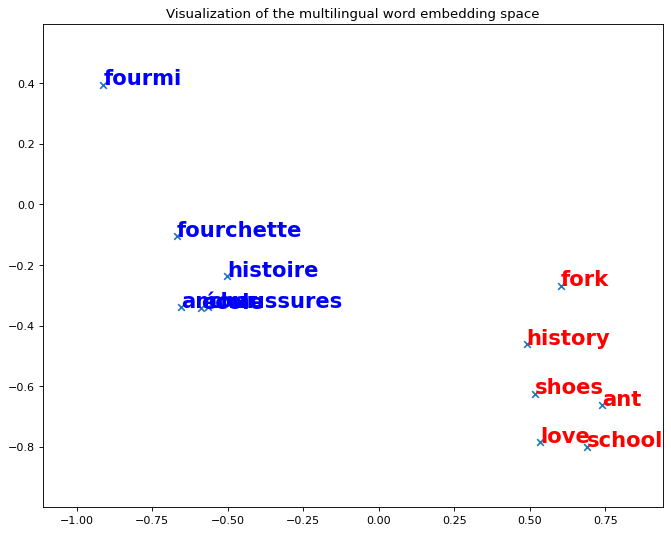

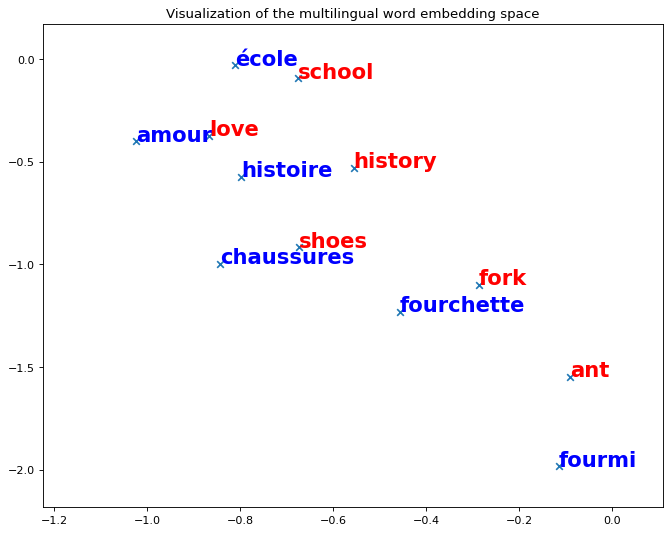

In [ ]:
# get 5 random input words
src_words = ['école', 'amour', 'histoire', 'chaussures',  'fourmi', 'fourchette']
tgt_words = ['school', 'love', 'history', 'shoes', 'ant', 'fork']

# assert words in dictionaries
for sw in src_words:
    assert sw in src_word2id, '"%s" not in source dictionary' % sw
for tw in tgt_words:
    assert tw in tgt_word2id, '"%s" not in target dictionary' % sw

plot_similar_word(src_words, src_word2id, src_embeddings, tgt_words, tgt_word2id, tgt_embeddings, pca, "src.png")
plot_similar_word(src_words, src_word2id, src_mused_embeddings, tgt_words, tgt_word2id, tgt_embeddings, pca_mused, "src_mused.png")

